# Practical 5: Heart dataset Logistic regression
### 12 Snehal Rakas
### Practical 5


###Performing the Preprocessing of Data

1. Importing the dataset and Analysis:

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Load the dataset
df = pd.read_csv('Heart.csv')

# Check the first few rows
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


2. Handle missing values (fill with median):


In [ ]:
# Check for missing values
df.isnull().sum()


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


3. Convert categorical columns to binary

In [ ]:
# Check unique values in chest pain type to ensure encoding
df['cp'].unique()

# One-hot encode categorical variables (if needed)
df = pd.get_dummies(df, columns=['cp', 'restecg'], drop_first=True)




```
# This is formatted as code
```

4. Splitting the dataset into features (X) and target (y):



In [ ]:
# Define the features (X) and the target (y)
X = df.drop('target', axis=1)
y = df['target']

# Verify the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (1025, 16)
Shape of y (target): (1025,)


In [ ]:
# Define features and target variable
X = df.drop('target', axis=1)  # 'target' is the column with heart disease label
y = df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Scale the features (X_train and X_test)
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

# Initialize Logistic Regression model
reg = LogisticRegression()

# Fit the model on the scaled training data
reg.fit(X_train_scale, y_train)

# Predict on the test set
y_pred = reg.predict(X_test_scale)

# Evaluate the performance
print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy on test set: 0.788961038961039

Confusion Matrix:
[[115  44]
 [ 21 128]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       159
           1       0.74      0.86      0.80       149

    accuracy                           0.79       308
   macro avg       0.79      0.79      0.79       308
weighted avg       0.80      0.79      0.79       308



In [ ]:
df.describe()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,131.611707,246.00000,0.149268,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,17.516718,51.59251,0.356527,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,94.000000,126.00000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,120.000000,211.00000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,130.000000,240.00000,0.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,140.000000,275.00000,0.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,200.000000,564.00000,1.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   sex        1025 non-null   int64  
 2   trestbps   1025 non-null   int64  
 3   chol       1025 non-null   int64  
 4   fbs        1025 non-null   int64  
 5   thalach    1025 non-null   int64  
 6   exang      1025 non-null   int64  
 7   oldpeak    1025 non-null   float64
 8   slope      1025 non-null   int64  
 9   ca         1025 non-null   int64  
 10  thal       1025 non-null   int64  
 11  target     1025 non-null   int64  
 12  cp_1       1025 non-null   bool   
 13  cp_2       1025 non-null   bool   
 14  cp_3       1025 non-null   bool   
 15  restecg_1  1025 non-null   bool   
 16  restecg_2  1025 non-null   bool   
dtypes: bool(5), float64(1), int64(11)
memory usage: 101.2 KB


In [ ]:
print(df.head())


   age  sex  trestbps  chol  fbs  thalach  exang  oldpeak  slope  ca  thal  \
0   52    1       125   212    0      168      0      1.0      2   2     3   
1   53    1       140   203    1      155      1      3.1      0   0     3   
2   70    1       145   174    0      125      1      2.6      0   0     3   
3   61    1       148   203    0      161      0      0.0      2   1     3   
4   62    0       138   294    1      106      0      1.9      1   3     2   

   target   cp_1   cp_2   cp_3  restecg_1  restecg_2  
0       0  False  False  False       True      False  
1       0  False  False  False      False      False  
2       0  False  False  False       True      False  
3       0  False  False  False       True      False  
4       0  False  False  False       True      False  


PERFORMING EDA

In [ ]:
print(df.describe())


               age          sex     trestbps        chol          fbs  \
count  1025.000000  1025.000000  1025.000000  1025.00000  1025.000000   
mean     54.434146     0.695610   131.611707   246.00000     0.149268   
std       9.072290     0.460373    17.516718    51.59251     0.356527   
min      29.000000     0.000000    94.000000   126.00000     0.000000   
25%      48.000000     0.000000   120.000000   211.00000     0.000000   
50%      56.000000     1.000000   130.000000   240.00000     0.000000   
75%      61.000000     1.000000   140.000000   275.00000     0.000000   
max      77.000000     1.000000   200.000000   564.00000     1.000000   

           thalach        exang      oldpeak        slope           ca  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean    149.114146     0.336585     1.071512     1.385366     0.754146   
std      23.005724     0.472772     1.175053     0.617755     1.030798   
min      71.000000     0.000000     0.000000  

In [ ]:
df.shape

(1025, 17)

###Exploratory Data Analytics

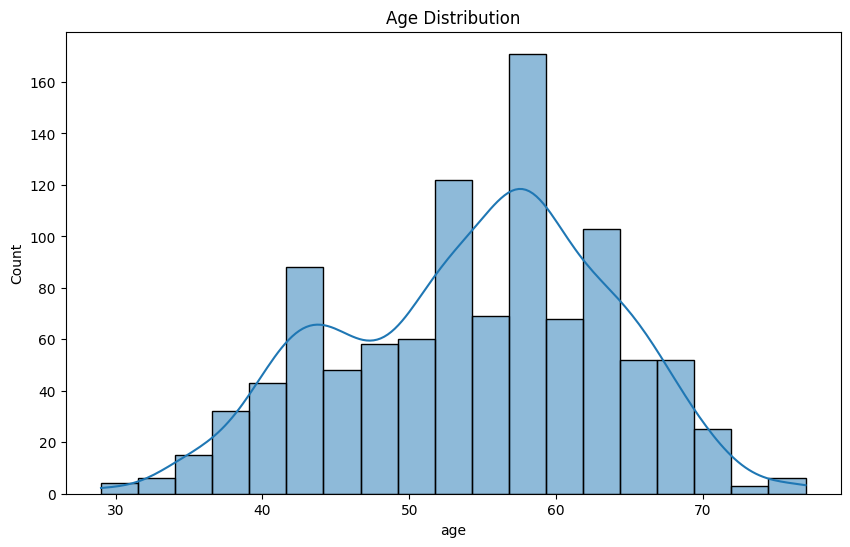

In [ ]:
# Checking distributions and relationships
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.show()


As in the above bar chart, the skewness is towards right more inclined so the more patients are more patients are younger, with fewer older patients.

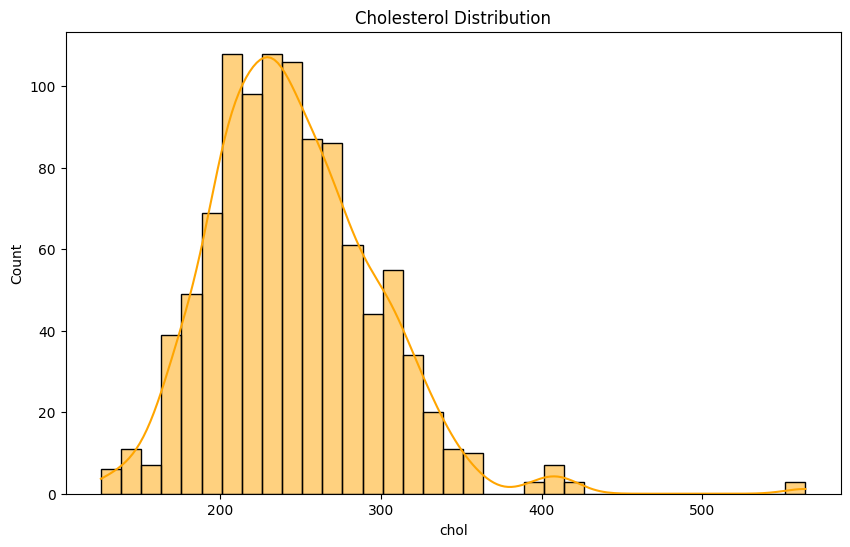

In [ ]:
# Distribution of Cholesterol (Chol)
plt.figure(figsize=(10, 6))
sns.histplot(df['chol'], kde=True, color='orange')
plt.title('Cholesterol Distribution')
plt.show()

In [ ]:
# Define the report content for the heart dataset
heart_report_content = """
Heart Dataset Preprocessing Report

1. Loaded the dataset.
2. Inspected the first few rows and data types.
3. Checked for missing values:
   - Missing values in the following columns:
     {}
4. Handled missing values:
   - Numerical columns were filled with the mean.
   - Categorical columns were filled with the mode.
5. Encoded categorical variables using one-hot encoding.
6. Scaled numerical features using StandardScaler.
"""

# Check for missing values
missing_values = heart_df.isnull().sum()
missing_columns = missing_values[missing_values > 0].index.tolist()

# Fill the report with missing columns
heart_report_content = heart_report_content.format(", ".join(missing_columns))

# Save the report to a text file
with open('heart_preprocessing_report.txt', 'w') as file:
    file.write(heart_report_content)

print("Heart dataset preprocessing report generated: heart_preprocessing_report.txt")


Heart dataset preprocessing report generated: heart_preprocessing_report.txt


In [ ]:
from google.colab import files


# Download the text report
files.download('heart_preprocessing_report.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Logistic Regression Model


In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Accuracy:  0.788961038961039
Confusion Matrix:
 [[115  44]
 [ 21 128]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       159
           1       0.74      0.86      0.80       149

    accuracy                           0.79       308
   macro avg       0.79      0.79      0.79       308
weighted avg       0.80      0.79      0.79       308



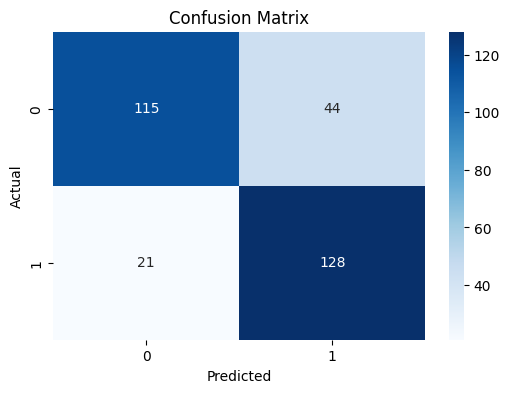

In [ ]:
# Confusion Matrix Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


4.2. Distribution of Target Variable



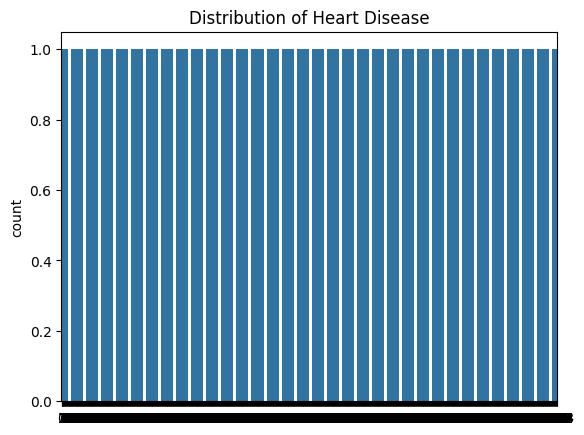

In [ ]:
# Plot the distribution of the target variable (heart disease presence)
sns.countplot(df['target'])
plt.title('Distribution of Heart Disease')
plt.show()


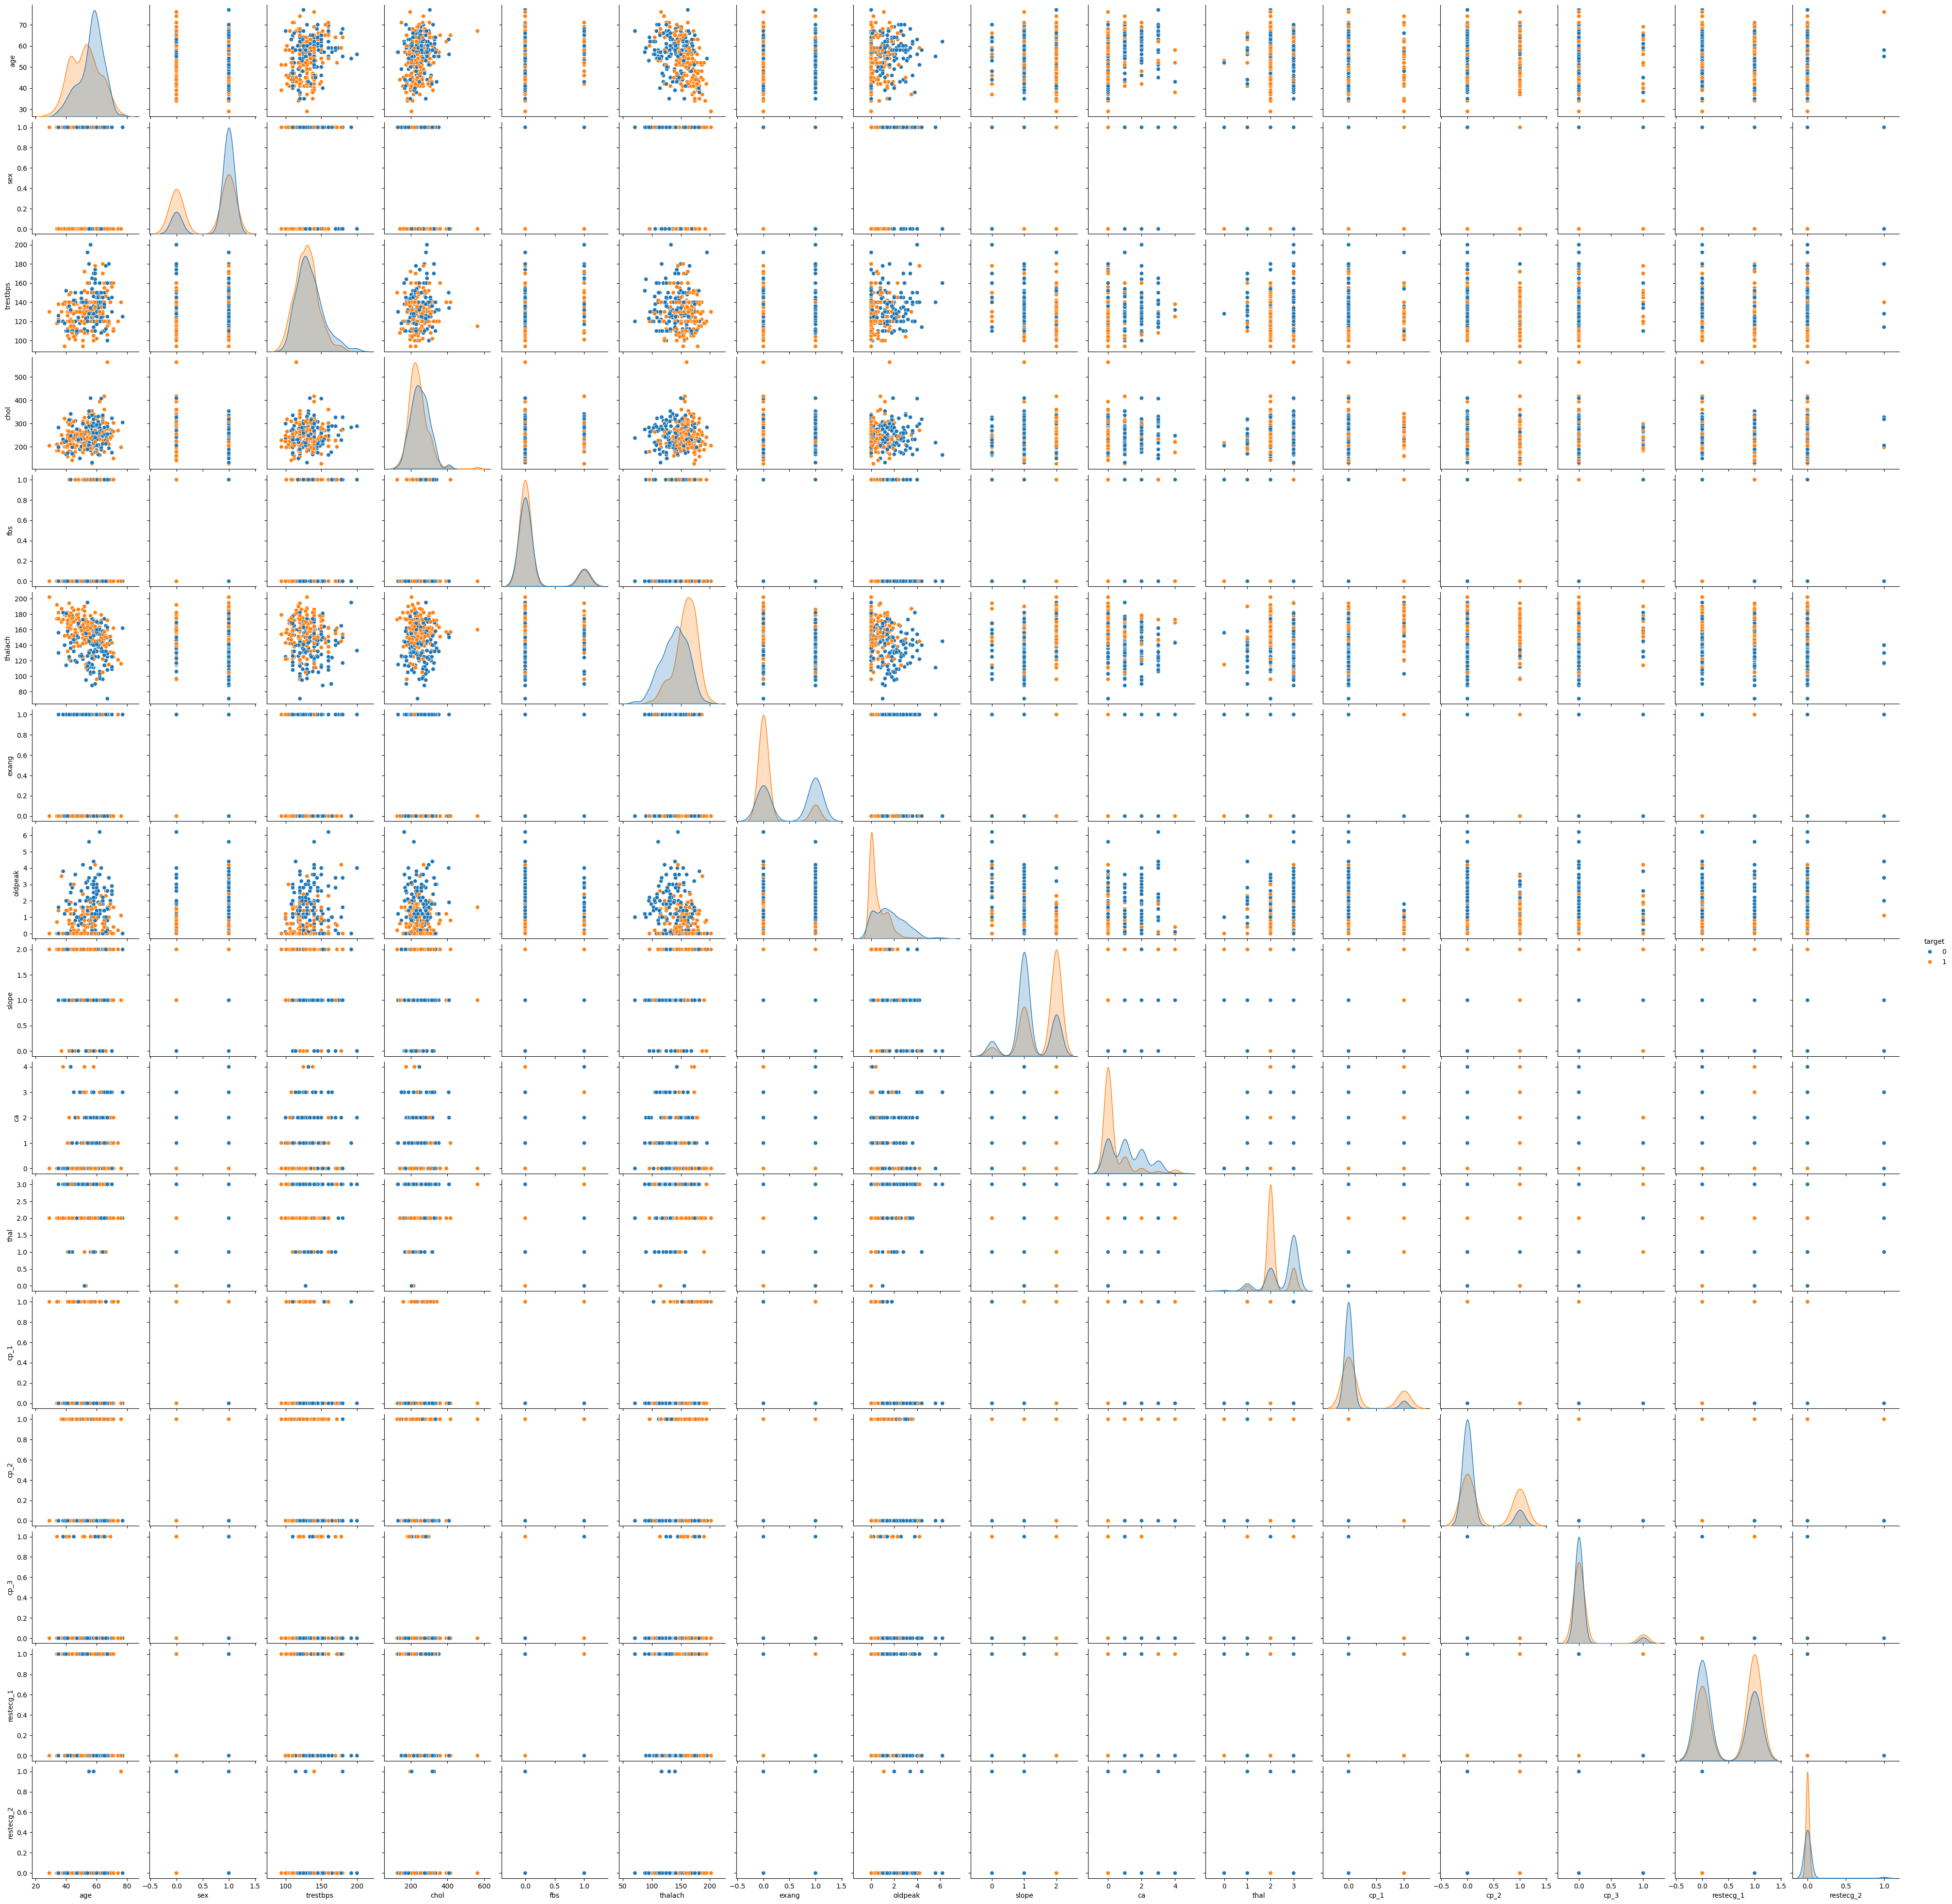

In [ ]:
# Pairplot for visualizing relationships between features
sns.pairplot(df, hue='target')
plt.show()


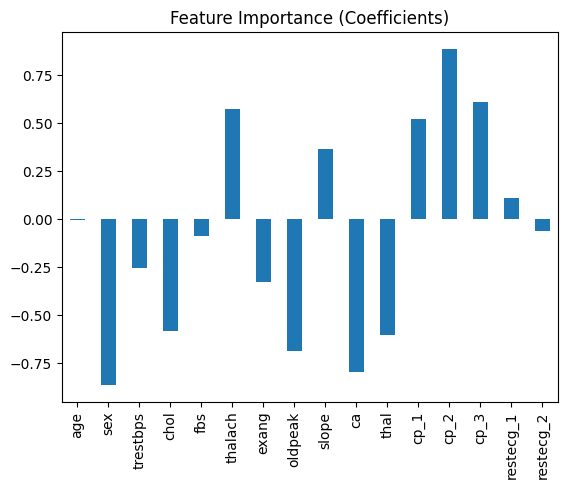

In [ ]:
# Check coefficients of the model
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
coefficients.T.plot(kind='bar', legend=False)
plt.title("Feature Importance (Coefficients)")
plt.show()
